# WHATSAPP FREQ WORDS ESTIMATOR

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

## Loading Data

In [3]:
lines = open('whatsapptext.txt', encoding='utf-8', errors='ignore').read().split('\n')

In [4]:
df = pd.DataFrame(lines)
df.head()

,0
0,"﻿04/04/17, 9:58 pm - Messages to this chat and..."
1,"04/04/17, 9:58 pm - Harish: Ji nalaiku"
2,"04/04/17, 9:58 pm - Harish: Poringlaa"
3,"04/04/17, 10:11 pm - Murugesh M: Therla Ji"
4,"04/04/17, 10:15 pm - Harish: Ji unga kitta"


## Data Preparation

In [5]:
def gen_freq(text):
    word_list=[]
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq=pd.Series(word_list).value_counts()
    word_freq[:20]
    return word_freq

In [48]:
fre = gen_freq(df[0].str);
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [45]:
import re
def clean_text(text):
    text=re.sub(r'RT', '', text)
    text=re.sub(r'[?!.:;,#@-]','', text)
    text=re.sub(r'[%d%d/%d%d/%d%d]','', text)
    text=re.sub(r'[0123456789]','', text)
    text=text.lower()
    return text

In [46]:
text=df[0].apply(lambda x: clean_text(x))
word_freq=gen_freq(text.str)*100
word_freq=word_freq.drop(labels=STOPWORDS, errors='ignore')

## Freq Words Generator

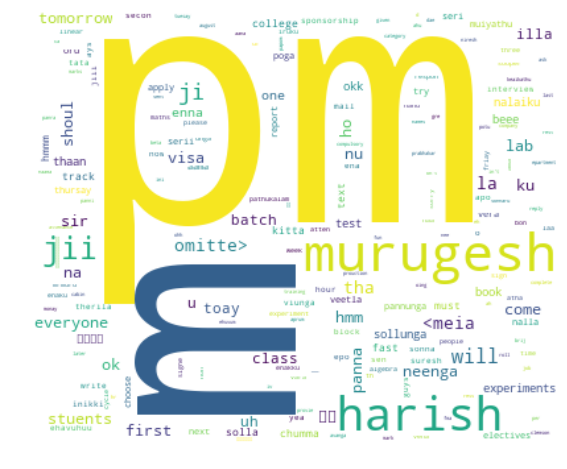

In [47]:
wc=WordCloud(width=400, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()